# Lab 11 – Keras

The code below is needed to run this lab file

In [35]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier

from scipy import stats

## Exercise 1 – Interview questions about deep learning and keras

### 1) What is an artificial neural network (ANN)?
An ANN is a type of computing system that mimics that neural networks found within humans. It does so by creating data types for nodes, and connecting these nodes with a weighted branch. This is the core framework of many modern systems that allows them to process complex structures and inputs.

### 2) What is deep learning? How does it relate to an ANN?
Deep learning is the scaled-up application of ANN into certain industries/areas in order to process and act upon mass amounts of unlabeled information. This allows deep learning algorithms to structure and categorize from the information that gets put in, and use that information to yield more accurate results over time.

### 3) Name a couple of examples where deep learning has made a tremendous impact.
Facial/Movement recognition (see: Kinect -> modern VR), linguistics (home assistant voice recognition), stock market trading/pattern recognition, image processing in smart cars.

### 4) Briefly, what is the feedforward algorithm with a neural net?
A feedforward algorithm is a type of neural network tree structure where information is passed from the 'input nodes', through the 'hidden node' layers, and is recieved finally at the'output nodes'. Here, information only flows one way, with no node paths leading to the preceding layer.

### 5) In the context of machine learning, what is a loss function? A loss function 

A loss function is an algorithm that evaluates how well the machine learning program modeled the dataset. It has an inverse relationship with accuracy. This means that low loss function results indicate high accuracy and high loss function results indicate low accuracy.

### 6) What is gradient descent? And how is the loss function a critical part of gradient descent?

Gradient descent is an algorithm to find the optimal minimization of cost by changing the model parameters. Lower loss values would be indicative of a better performing model.

Source: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

### 7) Training a neural net involves the backpropagation algorithm. In a few sentences, describe what this algorithm does.

The backpropagation algorithm utilizes the error from the loss function from above and uses it to change the weights of the paths between nodes in the neural net. The magnitude of the change directly depends on how much loss there was. The idea here is that the fixes 'propagate backwards' through the node layers so that over the course of program execution, the algorithm is able to update itself and yield higher accuracy.

### 8) What is the difference between batch gradient descent and stochastic gradient descent?

Batch gradient descent works with the aggregate dataset to get the cost function at all data points. In comparison, stochastic gradient descent uses a randomized order of samples sequentially in order to find the minimal cost functions, and consequentially, the most effective parameters.

Source: https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1

### 9) In the context of neural network training, explain the terms epoch and batch.

An 'epoch' is essentially a 'step' in which the model works through the entire data. You would essentially parse through the data a number of times equal to your epoch. A 'batch' is a quantity signifying the number of samples to work through before our model parameters get updated.

Source: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

### 10) In the context of machine learning, what is a hyperparameter?

A hyperparameter is set by the user before the model is ran, while other parameters are derived by training the model itself. An example of this would be the 'batch size', in which you tell the model how many samples to look at before updating.

Source: https://towardsdatascience.com/understanding-hyperparameters-optimization-in-deep-learning-models-concepts-and-tools-357002a3338a

### 11) In the context of neural nets training, what are examples of hyperparameters that can affect model performance?

epoch, quantity of layers, and batch size

### 12) What is an activation function?

An activation function is a function that is used to determine a node's output given the node inputs. Using a sigmoid function would allow the model to work with probabilities for inputs and outputs.

Source: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

### 13) Most agree that the most popular activation functions are sigmoid, hyperbolic tangent (tanh), softmax, and ReLu (rectified linear unit). Compare and contrast each, using whatever resources you want.

Sigmoid: An S-shaped function that is used on probability models to keep values between 0 and 1 (percentages).
Hyperbolic Tangent: Similar to Sigmoid, but goes from -1 to 1 instead. Negative inputs here will be able to retain their negative signage and magnitude instead of just magnitude.
Softmax:Calculates a probability distribution over multiple events. The range is between 0 to 1, with all probabilities summing to 1.  
ReLu: Most popular (apparently), ranges from 0 to infinity. It is 0 for all values <= 0, but then it is linear function for positive numbers above 0.

Source: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

### 14) Why is ReLu so popular for large, deep learning networks?

ReLu is really popular in this field since it has non saturation of its gradient, leading to a faster gradient descent evaluation compared to other activation functions. ReLu is also computationally and comparatively inexpensive to implement, only needing a matrix of activations instead of the exponentials in other functions.

Source: https://datascience.stackexchange.com/questions/23493/why-relu-is-better-than-the-other-activation-functions

### 15) Why is softmax most appropriate for the output layer, especially for classification problems?

Softmax is most appropriate here since it can take in values and pass them off as probability inputs. Not only that, but the target class will have the highest of these probability values. 

Source: https://www.quora.com/How-does-the-softmax-classification-layer-of-a-neural-network-work

### 16) What does ReLu sometimes suffer from, and how does a Leaky ReLu activation address it?

ReLu can sometimes suffer from what's known as the 'dying ReLu' problem. Essentially, this problem happens since all ReLu values below 0 are considered to just be 0, so negative values cannot be accurately processed by our model. To account for this, the Leaky ReLu activation function has a slight slope to it. Thus, the range is -inf to inf, and it can process values of any magnitude effectively. 

Source: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

### 17) What is Tensorflow? Who created it?

Tensorflow is a library containing machine learning tools/functions used primarily in academia. It was developed by an internal team over at Google.

### 18) What are tensors?

Tensors are a vector/matrix generalization that is manipulated and used to add dimensionality to variables.

### 19) What is keras? Who created it?

Keras is another python library that is primarily used in the creation of neural networks. This library was created by François Chollet.

### 20) Explain the relationship between keras and tensorflow. How are they similar? Different?

Keras is used in creating neural networks and Tensorflow is used in machine learning algorithms.

### 21) Describe what the Sequential class represents

The Sequential class is a linear stack of layers, allowing for easier implementation of multi-layer neural networks. However, input_shape is a factor that needs to be fed into the first layer of the Sequential class.

Source: https://keras.io/getting-started/sequential-model-guide/

### 22) What is a layer? How is a layer added to a model?

A layer is a selection of nodes implemented within a class. With these nodes, a number of mathematical operations can occur in order to update the loss, weight of the path, and more. This can be simply done by evoking the '.add' function on the model. 

### 23) What is a Dense layer?

A Dense layer is a densely connected layer class where the activation function is applied onto a weight matrix with bias accounted for, that occurs within the Neural Network.

Source: https://www.tensorflow.org/swift/api_docs/Structs/Dense

### 24) What does the compile method do for a model, and what two parameters are required to compile every model?

The compile method sets what we want to use for our loss and activation function (the two parameters needed) in order to train the model. 

## Exercise 2 - The return of Iris

### Disclaimer: The keras library was not working on my home computer, so the notebook was ran with Eli Mauskopf's computer in order to get output cells. All work done is my own, it just looks different with a bit of the output messages on the questions below

The code below is needed to run these exercises

In [37]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### 1) [P] Copy over your code from the previous lab that read in and pre-processed the iris dataset from seaborn. You should have a pandas dataframe that contains four numeric variables and one categorical variable representing the target class. You should have one dataframe X and a dataframe y representing the target class. Do not split your data into training and testing data yet.

In [38]:
df_iris = sns.load_dataset('iris')
df_iris['species'] = df_iris['species'].astype('category')

X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:, len(df_iris.columns) - 1:]

X = stats.zscore(X)

### 2) [P] Shuffle your data in your data frames. This will be important for later exercises. Read about the shuffle() function in sklearn.utils. Import it, and use it to shuffle your X and y data frames. Use random_state=0. Remember – it returns the shuffled data! So, be sure to reassign X and y.

In [39]:
X, y = shuffle(X, y, random_state=0)

### 3) [P] Use train_test_split to split your data, but this time, let's use an even smaller split, using a 50/50 split, initializing with a random state of 0. (Why? This is a relatively simple dataset. Let's make the problem a bit more challenging by introducing a smaller training data size.) Completing this will result in X_train, X_test, y_train and y_test data frames, both with 75 instances.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

### 4) [M] How many inputs will your network need to have?

This is going to need four inputs.

### 5) [M] Consider the outputs required for a neural network. Remember that the iris dataset is a multi-class dataset. It has to predict three different, categorical values. How do you represent a multi-class target variable in a model like a neural net? For the iris data, what does the final layer of your neural net structure need to look like?

To represent this, we're going to need to undergo binarization to work with our categorical variables. Within the iris dataset itself, the final layer of the neural net structure is going to have three nodes (since we are dealing with three classes in the dataset).

### 6) [P] Write the code to convert the iris target variables (i.e. y_train and y_test) to a set of binarized variables derived from the target class variable (why? Hopefully you figured out why based on your previous answer!)

In [41]:
y_train_binarized = pd.get_dummies(y_train)
y_test_binarized = pd.get_dummies(y_test)

### 7) Create an instance of Sequential() called model.

In [42]:
model = Sequential()

### 8) Now, we will sequentially add layers, starting with the hidden layer that receives the input, then you continue adding layers until you get to the output layer. We will keep it simple: one hidden layer, and one output layer. Add a Dense layer representing the hidden layer.

In [43]:
sigmoid = 'sigmoid'
model.add(Dense(9, input_shape=(4,), activation=sigmoid))

### 9) Add one more layer representing the output layer. Be sure to specify the correct number of outputs. Remember, use a 'softmax' activation here.

In [44]:
model.add(Dense(3, activation='softmax'))

### 10) OK. Now compile your model. Look at the documentation for the compile() method.

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#source: https://keras.io/models/model/

### 11) OK, your structure is set. Now you need to train the model. Look at the documentation for the fit() method. Use fit to train your model with X_train and your binarized y_train data.

In [46]:
history = model.fit(X_train, y_train_binarized, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, y_test_binarized))

Train on 75 samples, validate on 75 samples
Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 1.2535 - accuracy: 0.2400 - val_loss: 1.1177 - val_accuracy: 0.3600
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.2800 - val_loss: 1.0707 - val_accuracy: 0.5467
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0961 - accuracy: 0.5067 - val_loss: 1.0316 - val_accuracy: 0.6267
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0373 - accuracy: 0.6267 - val_loss: 0.9949 - val_accuracy: 0.6667
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.9845 - accuracy: 0.6400 - val_loss: 0.9585 - val_accuracy: 0.7600
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.9337 - accuracy: 0.6933 - val_loss: 0.9226 - val_accuracy: 0.7867
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8885 - accuracy: 0.8000 - val_loss:

### 12) [P] It's important to understand your accuracy and loss rates as your model proceeds through training. Visualize the loss on training and test data. Look at the code presented here: https://keras.io/visualization/. You may copy it, or make it more fancy if you choose to do so. Pay attention to the section of code that shows Training history visualization. You may also include the code that visualizes the model, as it may be good to know for your future. If you did everything correctly, you should show two graphs, one for model loss, and one for model accuracy.

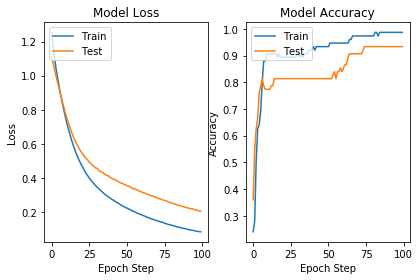

In [47]:
def model_performance():
    fig, (ax1, ax2) = plt.subplots(1, 2)

    #loss
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch Step')
    ax1.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

    #accuracy
    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch Step')
    ax2.legend(['Train', 'Test'], loc='upper left')

    plt.show()

model_performance()

### 13) Try to change some parameters with the model. However, instead of copying and pasting each individual line you wrote above, follow the approach of creating the entire structure in a single line. Use the example laid out in the Keras documention https://keras.io/getting-started/sequential-model-guide/ 

In [48]:
#from graphs above, 100 epochs looks like a bit much.
def exec_model(loss='categorical_crossentropy', optimizer='adamax', epochs=50, batch_size=1):
    model = Sequential([Dense(10, input_shape=(4,), activation = 'sigmoid'), 
                        Dense(12, activation='sigmoid'), 
                        Dense(6,activation='sigmoid'), 
                        Dense(3,activation='softmax')])
    model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
    history = model.fit(X_train, y_train_binarized, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test_binarized))
    return history

exec_model()

Train on 75 samples, validate on 75 samples
Epoch 1/50
75/75 [==============================] - 0s 5ms/step - loss: 1.1244 - accuracy: 0.3733 - val_loss: 1.1641 - val_accuracy: 0.2933
Epoch 2/50
75/75 [==============================] - 0s 1ms/step - loss: 1.0944 - accuracy: 0.3733 - val_loss: 1.1336 - val_accuracy: 0.2933
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0746 - accuracy: 0.3733 - val_loss: 1.1173 - val_accuracy: 0.2933
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0575 - accuracy: 0.3733 - val_loss: 1.0983 - val_accuracy: 0.2933
Epoch 5/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0405 - accuracy: 0.4933 - val_loss: 1.0702 - val_accuracy: 0.6000
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0138 - accuracy: 0.7333 - val_loss: 1.0477 - val_accuracy: 0.6000
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7333 - val_loss: 1.0126

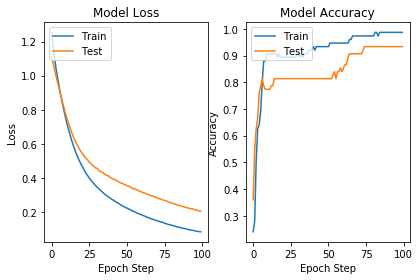

In [49]:
model_performance()

### 14) OK, one more time. This time, copy the same model, but use an SGD optimizer. Of course, you may have already chosen this by specifying the optimizer='sgd' parameter when you compiled your model. This time, you will instantiate your optimizer.

In [50]:
history = exec_model(optimizer=SGD(lr=0.5, momentum=0.5, decay=0.0, nesterov=False))

Train on 75 samples, validate on 75 samples
Epoch 1/50
75/75 [==============================] - 0s 4ms/step - loss: 1.3089 - accuracy: 0.3067 - val_loss: 1.3393 - val_accuracy: 0.2933
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 1.0410 - accuracy: 0.4933 - val_loss: 0.6379 - val_accuracy: 0.6000
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.6933 - val_loss: 0.5952 - val_accuracy: 0.6000
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7600 - val_loss: 0.7191 - val_accuracy: 0.6000
Epoch 5/50
75/75 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.7467 - val_loss: 0.3862 - val_accuracy: 0.9067
Epoch 6/50
75/75 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.7733 - val_loss: 0.6155 - val_accuracy: 0.5867
Epoch 7/50
75/75 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8533 - val_loss: 0.5235

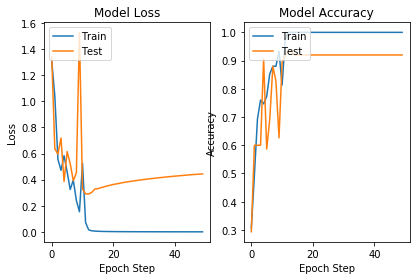

In [51]:
model_performance()

### 15) Remember, this is a classification problem. Use your model to predict the classes for the test data (using the function predict_classes), and store the results as y_pred.

In [52]:
y_pred = pd.Series(model.predict_classes(X_test))
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 'Iris-setosa'
    elif y_pred[i] == 1:
        y_pred[i] = 'Iris-versicolor'
    elif y_pred[i] == 2:
        y_pred[i] = 'Iris-virginica'
        
y_pred

0      Iris-virginica
1      Iris-virginica
2      Iris-virginica
3         Iris-setosa
4     Iris-versicolor
           ...       
70        Iris-setosa
71     Iris-virginica
72     Iris-virginica
73        Iris-setosa
74    Iris-versicolor
Length: 75, dtype: object

### 16) Finally, using your code from the lab on classification, output the confusion_matrix and the classification_report (from scikit-learn's metric package) to print out the complete performance results.

In [53]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [23,  0,  0,  0,  0,  0],
       [ 0, 20,  2,  0,  0,  0],
       [ 0,  3, 27,  0,  0,  0]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00       0.0
Iris-versicolor       0.00      0.00      0.00       0.0
 Iris-virginica       0.00      0.00      0.00       0.0
         setosa       0.00      0.00      0.00      23.0
     versicolor       0.00      0.00      0.00      22.0
      virginica       0.00      0.00      0.00      30.0

       accuracy                           0.00      75.0
      macro avg       0.00      0.00      0.00      75.0
   weighted avg       0.00      0.00      0.00      75.0



C:\Users\Eli\Anaconda3\envs\csci349\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eli\Anaconda3\envs\csci349\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Exercise 3 – Wrapping keras in the scikit-learn framework.

### 17) Import the above class into your code. Then write a function called create_keras_model(). Copy all of your code that creates the Sequential instance, adds the layers, activation functions, and compiles it, into this function.

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier

In [56]:
def create_keras_model():
    model = Sequential()
    model.add(Dense(10, input_shape=(4,), activation='sigmoid'))
    model.add(Dense(12,activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])
    return model

clf = KerasClassifier(build_fn=create_keras_model, verbose=1, epochs=100, batch_size=1)

### 18) At this point, you now have a classifier model that behaves like any other scikit-learn classifier! Cool, right? So, using the clf classifier above, use it just like you would any other classifier. Run the fit method on your classifier, just like you did in lab10. Use X_train and the one hot encoded y_train data. Then, use the predict() method to generate class predictions on X_test. Store the results in y_pred.

In [57]:
history = clf.fit(X_train, y_train_binarized)
y_pred = pd.Series(clf.predict(X_test))
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 'Iris-setosa'
    elif y_pred[i] == 1:
        y_pred[i] = 'Iris-versicolor'
    elif y_pred[i] == 2:
        y_pred[i] = 'Iris-virginica'
y_pred

Epoch 1/100
75/75 [==============================] - 0s 5ms/step - loss: 1.1087 - accuracy: 0.3733
Epoch 2/100
75/75 [==============================] - 0s 958us/step - loss: 1.0916 - accuracy: 0.3733
Epoch 3/100
75/75 [==============================] - 0s 959us/step - loss: 1.0836 - accuracy: 0.3733
Epoch 4/100
75/75 [==============================] - 0s 959us/step - loss: 1.0723 - accuracy: 0.3733
Epoch 5/100
75/75 [==============================] - 0s 958us/step - loss: 1.0660 - accuracy: 0.5067
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0519 - accuracy: 0.6133
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0411 - accuracy: 0.7200
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0232 - accuracy: 0.6533
Epoch 9/100
75/75 [==============================] - 0s 958us/step - loss: 1.0049 - accuracy: 0.7333
Epoch 10/100
75/75 [==============================] - 0s 959us/step - loss: 0.9795 - accuracy: 0.73

0      Iris-virginica
1      Iris-virginica
2      Iris-virginica
3         Iris-setosa
4     Iris-versicolor
           ...       
70        Iris-setosa
71     Iris-virginica
72     Iris-virginica
73        Iris-setosa
74    Iris-versicolor
Length: 75, dtype: object

### 19) Use the predictions to generate a confusion matrix.

In [58]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [23,  0,  0,  0,  0,  0],
       [ 0, 18,  4,  0,  0,  0],
       [ 0,  1, 29,  0,  0,  0]], dtype=int64)

### 20) Generate a performance report with the classification_report function.

In [59]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00       0.0
Iris-versicolor       0.00      0.00      0.00       0.0
 Iris-virginica       0.00      0.00      0.00       0.0
         setosa       0.00      0.00      0.00      23.0
     versicolor       0.00      0.00      0.00      22.0
      virginica       0.00      0.00      0.00      30.0

       accuracy                           0.00      75.0
      macro avg       0.00      0.00      0.00      75.0
   weighted avg       0.00      0.00      0.00      75.0



C:\Users\Eli\Anaconda3\envs\csci349\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eli\Anaconda3\envs\csci349\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 21) Now, harness the power of wrapping this class. Use your code from lab10 that performed a full cross validation. For sake of your time, you may set K to 5.

In [60]:
k = 5
df_results = pd.Series()
df_pred = pd.Series()
df_X = pd.DataFrame(X)
y_binarized = pd.get_dummies(y)

for i, (train_i, test_i) in enumerate(KFold(n_splits=k, random_state=0, shuffle=True).split(df_iris)):
    print('Starting Fold #{}'.format(i+1))
    X_train = df_X.iloc[train_i]
    y_train = y_binarized.iloc[train_i]
    X_test = df_X.iloc[test_i]
    y_test = y_binarized.iloc[test_i]
    
    start_time = time.time()
    clf = KerasClassifier(build_fn=create_keras_model,
                          verbose=0,
                          epochs=100,
                          batch_size=1)
    
    clf.fit(X_train, y_train)
    elapsed_time = round((time.time() - start_time), 2)
    
    print('Fold #{} complete, time to fit model = {} seconds'.format(i+1, elapsed_time))
    
    y_pred = pd.Series(clf.predict(X_test))
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            y_pred[i] = 'Iris-setosa'
        elif y_pred[i] == 1:
            y_pred[i] = 'Iris-versicolor'
        else:
            y_pred[i] = 'Iris-virginica'

    x = y_test.stack()
    y_test = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))

    df_results = df_results.append(y_test.astype(object), ignore_index=True)
    df_pred = df_pred.append(y_pred.astype(object), ignore_index=True)

Starting Fold #1
Fold #1 complete, time to fit model = 11.42 seconds
Starting Fold #2
Fold #2 complete, time to fit model = 22.42 seconds
Starting Fold #3
Fold #3 complete, time to fit model = 24.73 seconds
Starting Fold #4
Fold #4 complete, time to fit model = 25.7 seconds
Starting Fold #5
Fold #5 complete, time to fit model = 26.79 seconds


### 22) Generate a full confusion matrix and final classification report based on your 5-fold cross validation of the keras model.

In [61]:
confusion_matrix(df_results, df_pred)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [50,  0,  0,  0,  0,  0],
       [ 0, 45,  5,  0,  0,  0],
       [ 0,  2, 48,  0,  0,  0]], dtype=int64)

In [62]:
print(classification_report(df_results, df_pred))

                    precision    recall  f1-score   support

       Iris-setosa       0.00      0.00      0.00       0.0
   Iris-versicolor       0.00      0.00      0.00       0.0
    Iris-virginica       0.00      0.00      0.00       0.0
    species_setosa       0.00      0.00      0.00      50.0
species_versicolor       0.00      0.00      0.00      50.0
 species_virginica       0.00      0.00      0.00      50.0

          accuracy                           0.00     150.0
         macro avg       0.00      0.00      0.00     150.0
      weighted avg       0.00      0.00      0.00     150.0



C:\Users\Eli\Anaconda3\envs\csci349\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eli\Anaconda3\envs\csci349\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
